In [1]:
### Import packages
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import missingno as msno
### Analysis
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from collections import Counter
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

In [2]:
data = pd.read_pickle("data_knnimputed.pkl")
data=data.astype('category')

In [3]:
dummies=pd.get_dummies(data[['age_cat','education_cat','household','curfew_effective','curfew_compliance','gov_effect_econ','trust_fedgov','empl_status']],drop_first=True)
data = pd.concat([data.drop(['age_cat','education_cat','household','curfew_effective','curfew_compliance','gov_effect_econ','trust_fedgov','empl_status'],axis=1), dummies],axis=1)
data = data.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3764
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sex                    3654 non-null   category
 1   intention_to_vote      3654 non-null   category
 2   political_orientation  3654 non-null   category
 3   marstat                3654 non-null   category
 4   prob_gettinginfected   3654 non-null   category
 5   measures_adaptedwork   3654 non-null   category
 6   curfew_punish          3654 non-null   category
 7   sourceinfo_tradmedia   3654 non-null   category
 8   sourceinfo_localnewsp  3654 non-null   category
 9   sourceinfo_personal    3654 non-null   category
 10  choice_of_party        3654 non-null   category
 11  age_cat_2.0            3654 non-null   category
 12  age_cat_3.0            3654 non-null   category
 13  age_cat_4.0            3654 non-null   category
 14  education_cat_2.0      3654 non-null   c

Class=1, n=751 (20.553%)
Class=5, n=805 (22.031%)
Class=4, n=337 (9.223%)
Class=6, n=304 (8.320%)
Class=2, n=383 (10.482%)
Class=8, n=684 (18.719%)
Class=7, n=100 (2.737%)
Class=3, n=290 (7.937%)


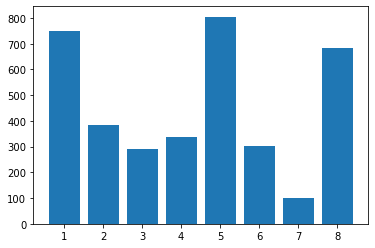

In [4]:
X=data.drop('choice_of_party', axis=1)
y=data['choice_of_party']
col_names = X.columns

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [5]:
### CLASSIFIER COMPARISON
# Code source: Gaël Varoquaux, Andreas Müller Modified for documentation by Jaques Grobler
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

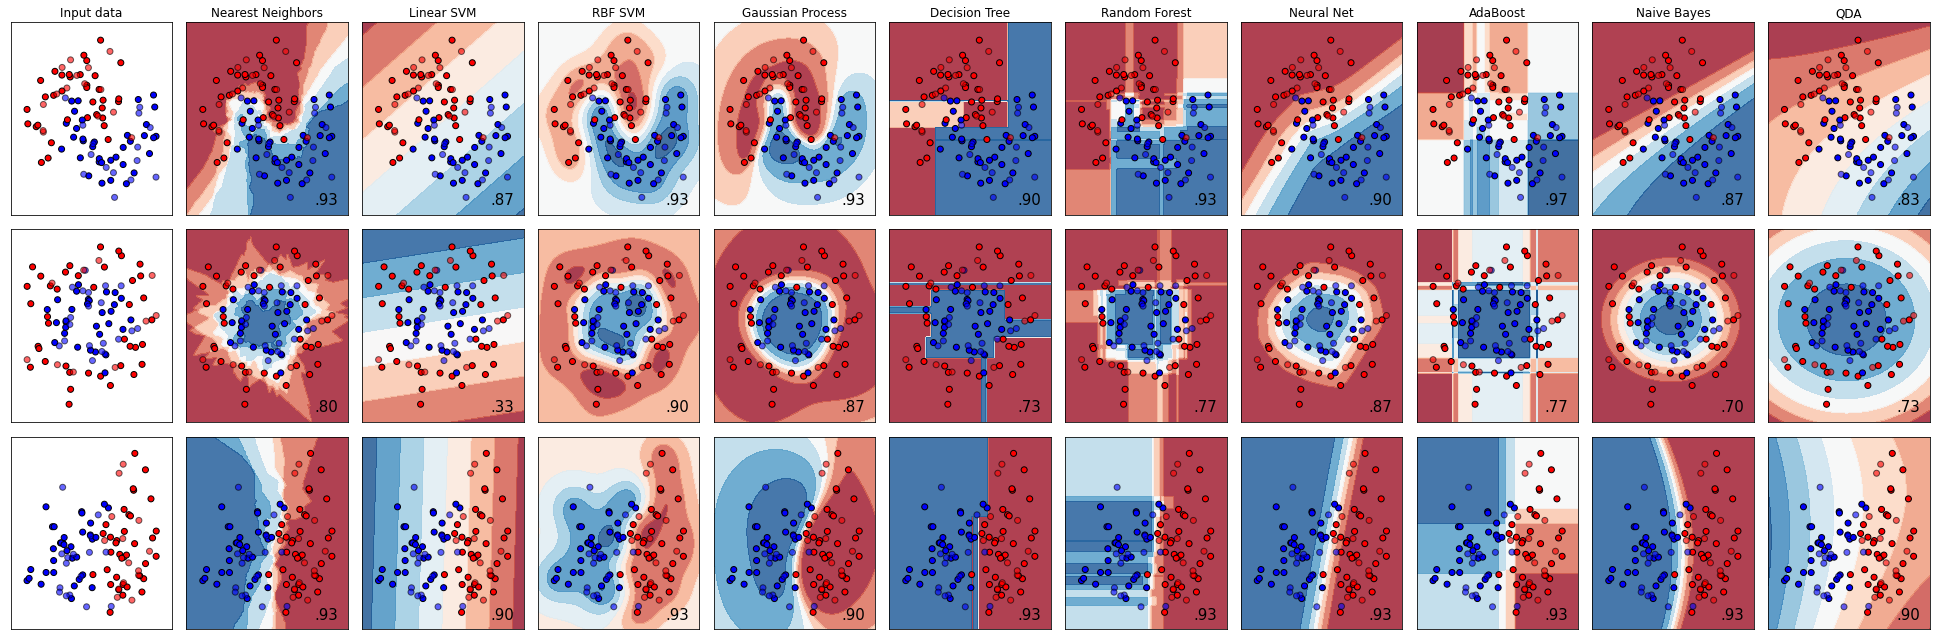

In [5]:
### A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers.
### The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(8),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [5]:
### SVM & ROC CURVE
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

In [8]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel="rbf", probability=False, random_state=random_state),n_jobs=-1)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [10]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

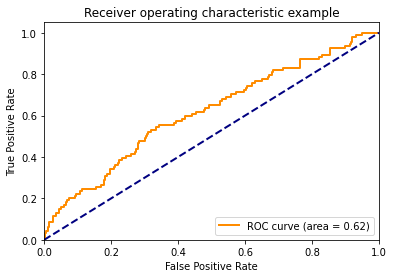

In [11]:
# Plot of a ROC curve for a specific class_ Class:2
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

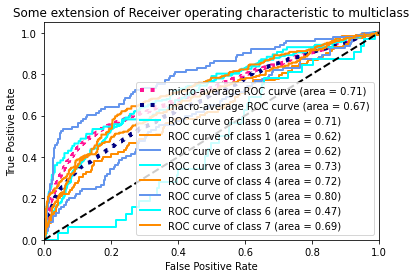

In [12]:
### Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =0.3, stratify=y)
rf=RandomForestClassifier()
params_rf={'criterion':['gini','entropy'],'n_estimators':[100,200], 'max_depth':[3,4,5], 'min_samples_leaf':[1,2,3,5],'min_samples_split':[2,3,4,5], 'max_features':['auto','log2']}
grid_rf=GridSearchCV(estimator=rf, param_grid=params_rf,cv=10, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_hyper_rf=grid_rf.best_params_
print('Best hyperparameters\n', best_hyper_rf)
print('Best Score: %s' % grid_rf.best_score_)

Best hyperparameters
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.40045343137254896


In [6]:
rf_bestmodel=RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto', min_samples_leaf=3, min_samples_split=2, n_estimators=100, class_weight='balanced')
rf_bestmodel.fit(X_train,y_train)
y_bestpred=rf_bestmodel.predict(X_test)
print(classification_report(y_test,y_bestpred))

              precision    recall  f1-score   support

         1.0       0.45      0.58      0.51       226
         2.0       0.28      0.17      0.22       115
         3.0       0.25      0.15      0.19        87
         4.0       0.31      0.59      0.41       101
         5.0       0.51      0.34      0.41       242
         6.0       0.27      0.64      0.38        91
         7.0       0.00      0.00      0.00        30
         8.0       0.62      0.25      0.36       205

    accuracy                           0.38      1097
   macro avg       0.34      0.34      0.31      1097
weighted avg       0.42      0.38      0.37      1097



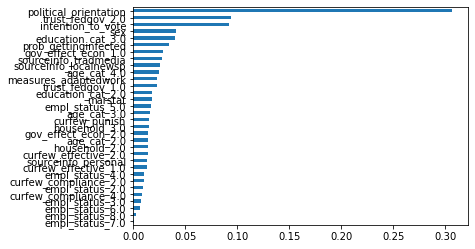

In [7]:
#feature importance
feature_imp=pd.Series(rf_bestmodel.feature_importances_, col_names).sort_values()
feature_imp.plot(kind='barh')
plt.show()

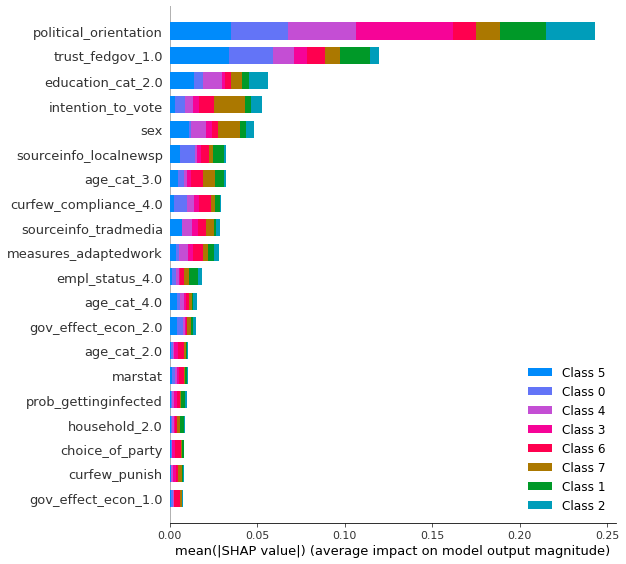

In [11]:
import shap
explainer = shap.TreeExplainer(rf_bestmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, data.columns, plot_type="bar")